In [2]:
import numpy as np
import seaborn as sns
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa

Verify GPU support

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Loading data

In [4]:
duration = 10 # minutes

In [5]:
input_data, sr = librosa.load('data/in.wav', 
                              sr=44100, 
                              duration=60 * duration, 
                              mono=True)
output_data, sr = librosa.load('data/cab+comp.wav', 
                               sr=44100, 
                               duration=60 * duration, 
                               mono=True)

In [6]:
from librosa.effects import preemphasis

input_data = preemphasis(input_data, coef=0.95)
output_data = preemphasis(input_data, coef=0.95)

In [7]:
print(f'Input shape: {input_data.shape}')
print(f'Output shape: {input_data.shape}')
print(f'Total: {input_data.shape[0] // sr} seconds')

Input shape: (26460000,)
Output shape: (26460000,)
Total: 600 seconds


In [17]:
def batch_to_mel(batch: np.ndarray, **kwargs: dict) -> None:
  mel = librosa.feature.melspectrogram(y=batch, **kwargs)
  mel_db = librosa.power_to_db(mel, ref=np.max)
  img = librosa.display.specshow(mel_db, sr=kwargs['sr'], x_axis='time', y_axis='mel')
  plt.savefig("out.png")

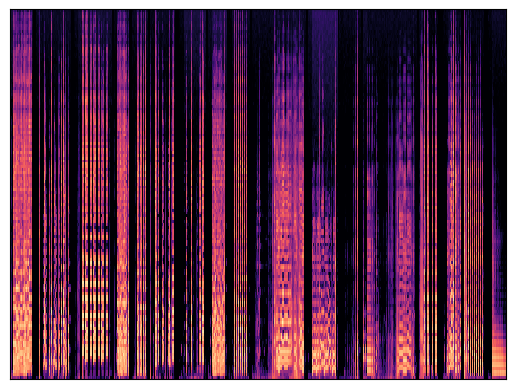

In [18]:
batch_to_mel(input_data, sr=44100)